In [ ]:
# Importações
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# É necessário ter o arquivo "trabalho4_dados_8.csv" no ambiente do colab
db = pd.read_csv("trabalho4_dados_8.csv")

# Conhecendo os dados

In [ ]:
# Exibe as "n" primeiras linhas
n = 10
db.head(n)

,Games,Affordance,Signifier,Constraint,Mapping,Feedback,Year
0,Guild of Dungeoneering,0.36,38,30,20,0.677419,2015.0
1,Resident Evil 7: Biohazard,0.33,35,29,25,0.516129,2017.0
2,Beat Saber,0.31,31,27,21,0.193548,2018.0
3,Super Monkey Ball: Banana Blitz HD,0.40,42,34,28,0.806452,2019.0
4,Smash Hit,0.23,23,17,17,0.064516,2014.0
5,Plants vs. Zombies: Battle for Neighborville,0.36,38,30,26,0.677419,2019.0
6,F1 Race Stars,0.35,37,29,23,0.516129,2012.0
7,Animation Throwdown: The quest for Cards,0.37,39,31,19,0.580645,2016.0
8,Sleeping Dogs,0.35,37,29,25,0.645161,2012.0
9,Darksiders Genesis,0.34,36,30,26,0.548387,2019.0


In [ ]:
# Formato da base (número de linhas e colunas)
db.shape

(90, 7)

In [ ]:
# Tipos de dados
db.dtypes

,0
Games,object
Affordance,float64
Signifier,int64
Constraint,int64
Mapping,int64
Feedback,float64
Year,float64


In [ ]:
# Converter a coluna 'Year' para int64
db['Year'] = db['Year'].astype('int64')

# Verificar os tipos de dados após a conversão
print(db.dtypes)

Games          object
Affordance    float64
Signifier       int64
Constraint      int64
Mapping         int64
Feedback      float64
Year            int64
dtype: object


In [ ]:
# Resumo das informações do conjunto de dados
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Games       90 non-null     object 
 1   Affordance  90 non-null     float64
 2   Signifier   90 non-null     int64  
 3   Constraint  90 non-null     int64  
 4   Mapping     90 non-null     int64  
 5   Feedback    90 non-null     float64
 6   Year        90 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 5.1+ KB


In [ ]:
# Verificação de valores ausentes
md_count = db.isnull().sum()
md_count

,0
Games,0
Affordance,0
Signifier,0
Constraint,0
Mapping,0
Feedback,0
Year,0


In [ ]:
# Verificar se há dados duplicados
print(db.duplicated().sum())

29


In [ ]:
# Mostrar a distribuição de duplicatas em grupos
duplicates = db[db.duplicated(keep=False)]
count_group = duplicates.groupby(duplicates.columns.tolist()).size()
print(count_group.value_counts())

2    18
3     2
5     1
4     1
Name: count, dtype: int64


In [ ]:
# Seleciona uma linha duplicada para visualização
example_duplicate = db[db.duplicated(keep=False)].iloc[3]

# Mostrar as ocorrências dessa exemplo
especif_row = db[db.eq(example_duplicate).all(axis=1)]
especif_row

,Games,Affordance,Signifier,Constraint,Mapping,Feedback,Year
14,The Legend of Zelda: Ocarina of Time,0.21,21,17,19,0.064516,1998
24,The Legend of Zelda: Ocarina of Time,0.21,21,17,19,0.064516,1998
34,The Legend of Zelda: Ocarina of Time,0.21,21,17,19,0.064516,1998
77,The Legend of Zelda: Ocarina of Time,0.21,21,17,19,0.064516,1998
83,The Legend of Zelda: Ocarina of Time,0.21,21,17,19,0.064516,1998


# Tratamento dos dados

In [ ]:
# Remoção de duplicidades
print(f"DB Original: {len(db)} linhas")
db = db.drop_duplicates()
print(f"Sem duplicidades: {len(db)} linhas")

DB Original: 90 linhas
Sem duplicidades: 61 linhas


## Normalização

In [ ]:
# Normalização
numeric_columns = db.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Year')

# Normalização com Min-Max (0 a 1)
db_normalized = db.copy()

# Aplicar normalização em colunas numéricas
scaler = MinMaxScaler(feature_range=(0, 1))
db_normalized[numeric_columns] = scaler.fit_transform(db_normalized[numeric_columns])

# Verificação
min_val = db_normalized[numeric_columns[0]].min()
max_val = db_normalized[numeric_columns[0]].max()
print(db[numeric_columns[0]].min())
print(db[numeric_columns[0]].max())
print(db_normalized[numeric_columns[0]].min())
print(db_normalized[numeric_columns[0]].max())

0.21
0.46
0.0
1.0


In [ ]:
db = db_normalized.copy()
db.head()

,Games,Affordance,Signifier,Constraint,Mapping,Feedback,Year
0,Guild of Dungeoneering,0.60,0.629630,0.466667,0.40,0.677419,2015
1,Resident Evil 7: Biohazard,0.48,0.518519,0.433333,0.65,0.516129,2017
2,Beat Saber,0.40,0.370370,0.366667,0.45,0.193548,2018
3,Super Monkey Ball: Banana Blitz HD,0.76,0.777778,0.600000,0.80,0.806452,2019
4,Smash Hit,0.08,0.074074,0.033333,0.25,0.064516,2014


## Reanálise dos dados

In [ ]:
# Verificação
def describe(column):
  print(f"== {column} ==")
  print(db[column].describe())
  print()

for column in db.columns:
  describe(column)

== Games ==
count                         61
unique                        61
top       Guild of Dungeoneering
freq                           1
Name: Games, dtype: object

== Affordance ==
count    61.000000
mean      0.423607
std       0.234422
min       0.000000
25%       0.240000
50%       0.480000
75%       0.600000
max       1.000000
Name: Affordance, dtype: float64

== Signifier ==
count    61.000000
mean      0.445659
std       0.241638
min       0.000000
25%       0.222222
50%       0.518519
75%       0.629630
max       1.000000
Name: Signifier, dtype: float64

== Constraint ==
count    61.000000
mean      0.355738
std       0.192423
min       0.000000
25%       0.166667
50%       0.400000
75%       0.466667
max       1.000000
Name: Constraint, dtype: float64

== Mapping ==
count    61.000000
mean      0.456557
std       0.237781
min       0.000000
25%       0.250000
50%       0.500000
75%       0.650000
max       1.000000
Name: Mapping, dtype: float64

== Feedback ==
count    

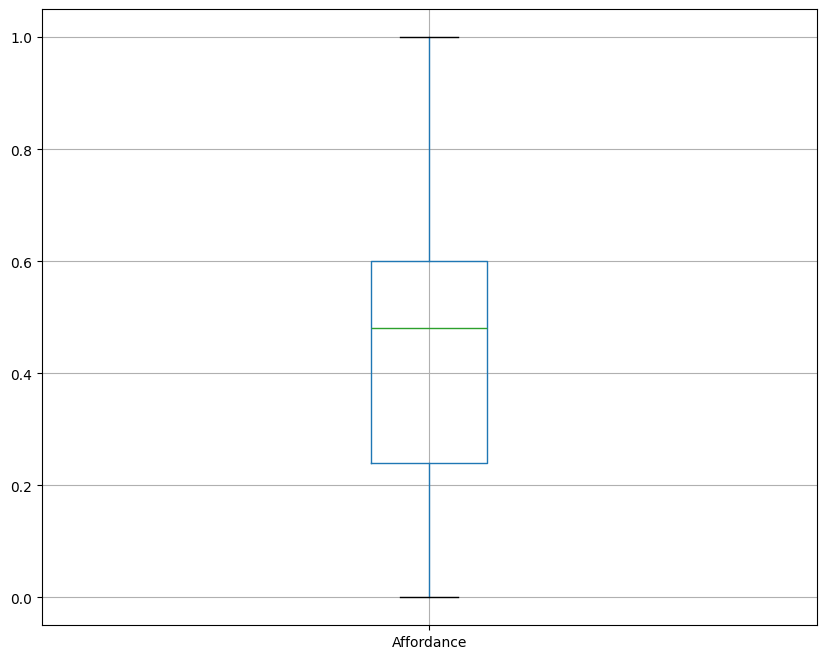

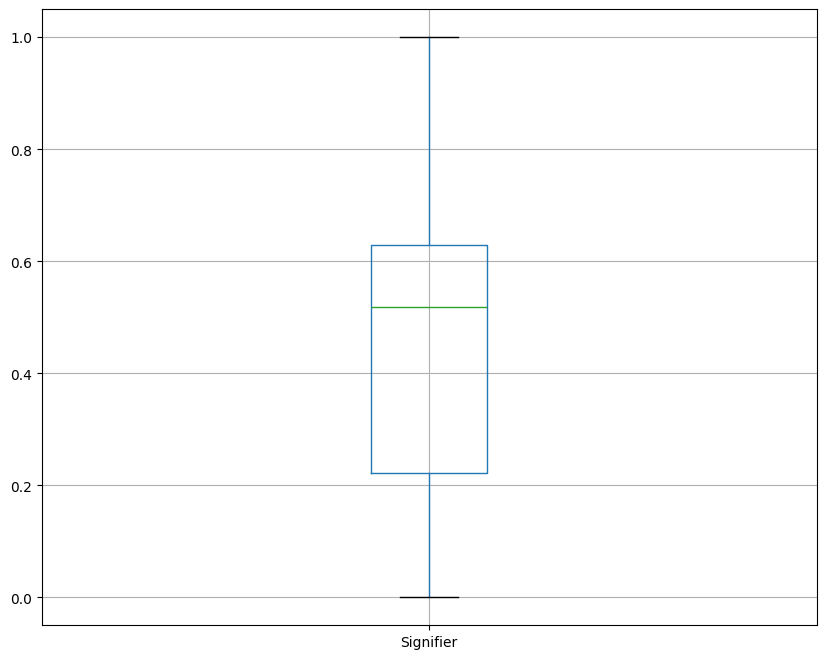

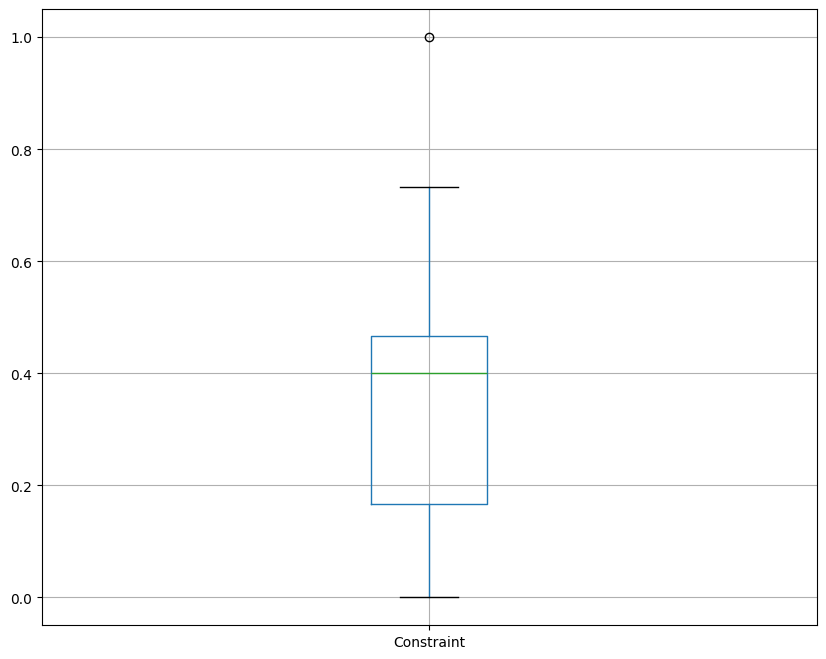

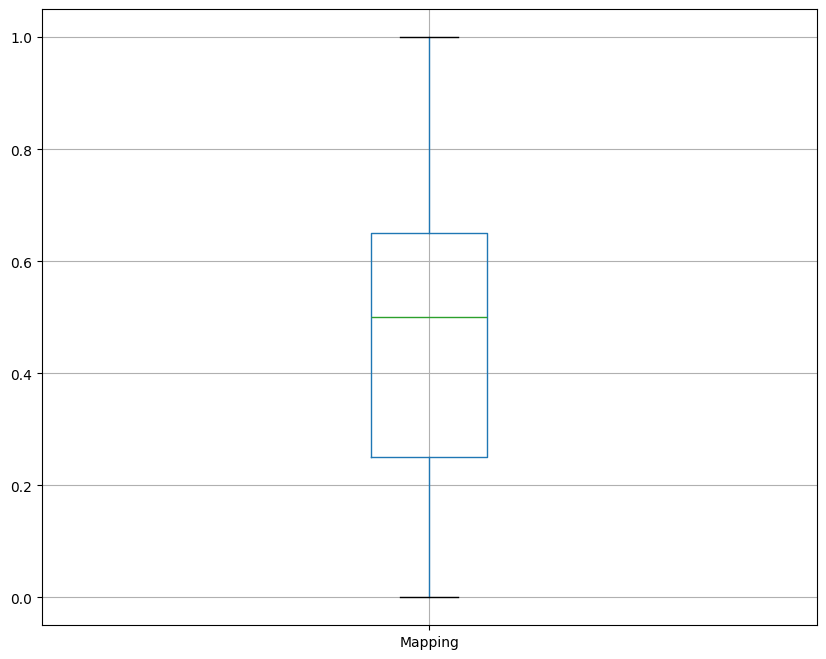

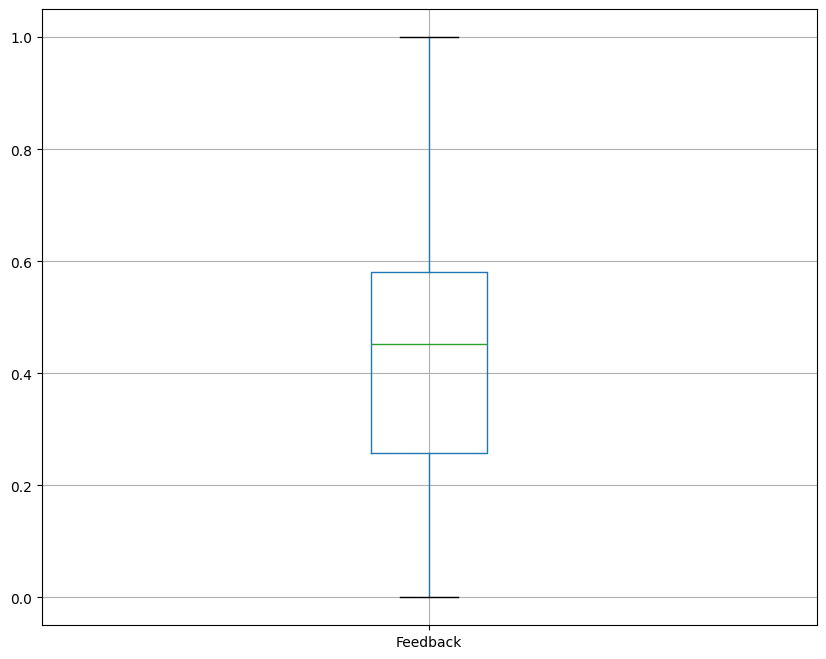

In [ ]:
design_cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback"]
for col in design_cols:
  plt.figure(figsize=(10,8))
  db.boxplot(column=col)
  plt.show()

In [ ]:
design_cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback"]

# Top games por cada atributo de design
for col in design_cols:
  top = db.nlargest(5, col)
  print(f"\nTop 5 games com maior {col}")
  display(top[['Games', col]])

# Top games com maior média entre os atributos de design
db['design_mean'] = db[design_cols].mean(axis=1)
top_avg_games = db.nlargest(5, 'design_mean')

print("\nTop 5 games com maior média nos atributos:")
display(top_avg_games[['Games', 'design_mean']])

db = db.drop('design_mean', axis=1)


Top 5 games com maior Affordance


,Games,Affordance
49,Among Us VR,1.00
3,Super Monkey Ball: Banana Blitz HD,0.76
33,Grand Theft Auto V,0.76
26,Gwent: The Witcher Card Game,0.72
18,Unrailed!,0.68



Top 5 games com maior Signifier


,Games,Signifier
49,Among Us VR,1.000000
3,Super Monkey Ball: Banana Blitz HD,0.777778
33,Grand Theft Auto V,0.777778
26,Gwent: The Witcher Card Game,0.740741
18,Unrailed!,0.703704



Top 5 games com maior Constraint


,Games,Constraint
49,Among Us VR,1.000000
33,Grand Theft Auto V,0.733333
3,Super Monkey Ball: Banana Blitz HD,0.600000
26,Gwent: The Witcher Card Game,0.566667
70,Ace Combat 7: Skies Unknown,0.566667



Top 5 games com maior Mapping


,Games,Mapping
49,Among Us VR,1.00
33,Grand Theft Auto V,0.90
3,Super Monkey Ball: Banana Blitz HD,0.80
15,Deep Rock Galactic,0.75
27,Brutal Legend,0.75



Top 5 games com maior Feedback


,Games,Feedback
49,Among Us VR,1.000000
3,Super Monkey Ball: Banana Blitz HD,0.806452
33,Grand Theft Auto V,0.741935
15,Deep Rock Galactic,0.709677
27,Brutal Legend,0.709677



Top 5 games com maior média nos atributos:


,Games,design_mean
49,Among Us VR,1.000000
33,Grand Theft Auto V,0.782609
3,Super Monkey Ball: Banana Blitz HD,0.748846
70,Ace Combat 7: Skies Unknown,0.666602
26,Gwent: The Witcher Card Game,0.664514


## Atributo Year

*   O ano de lançamento (Year) é uma variável temporal e já segmenta os jogos naturalmente (jogos antigos tendem a ter certas características diferentes dos mais novos).
*   Informação: os atributos utilizados devem ser indiferentes da variável temporal.
*   Year retirado => análise descritiva pós-clusterização

In [ ]:
# Remoção da variável Year
db_year = db.copy()
db = db.drop(columns=['Year'])

In [ ]:
db.head()

,Games,Affordance,Signifier,Constraint,Mapping,Feedback
0,Guild of Dungeoneering,0.60,0.629630,0.466667,0.40,0.677419
1,Resident Evil 7: Biohazard,0.48,0.518519,0.433333,0.65,0.516129
2,Beat Saber,0.40,0.370370,0.366667,0.45,0.193548
3,Super Monkey Ball: Banana Blitz HD,0.76,0.777778,0.600000,0.80,0.806452
4,Smash Hit,0.08,0.074074,0.033333,0.25,0.064516


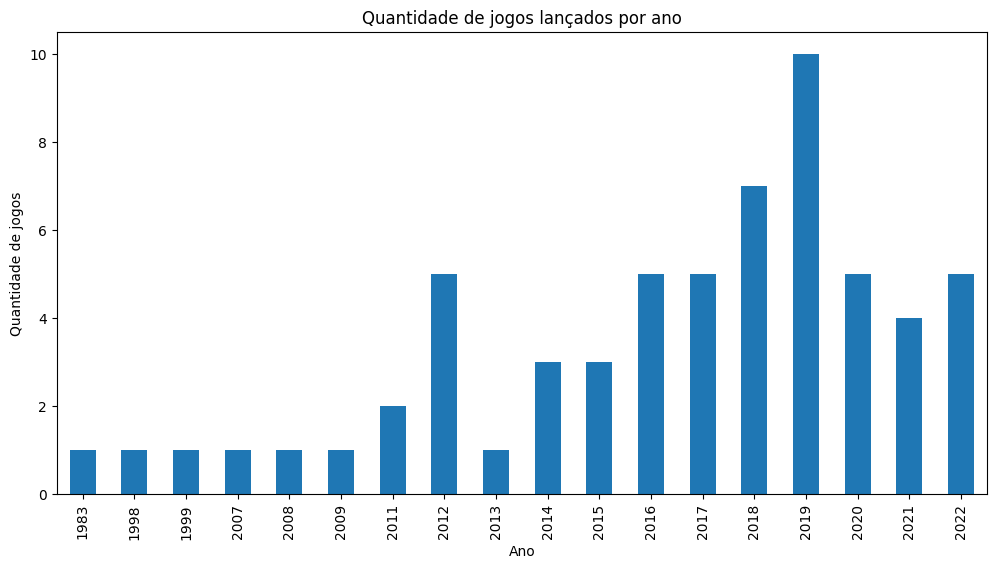

In [ ]:
# Contagem de jogos por ano
games_per_year = db_year["Year"].value_counts().sort_index()

plt.figure(figsize=(12,6))
games_per_year.plot(kind="bar")
plt.xlabel("Ano")
plt.ylabel("Quantidade de jogos")
plt.title("Quantidade de jogos lançados por ano")
plt.show()

In [ ]:
# Agrupamento por Year
year_stats = db_year.groupby("Year")[["Affordance", "Signifier", "Constraint", "Mapping", "Feedback"]].mean()

# Visualizar os primeiros anos
print(year_stats)

      Affordance  Signifier  Constraint   Mapping  Feedback
Year                                                       
1983    0.040000   0.037037    0.000000  0.000000  0.032258
1998    0.000000   0.000000    0.033333  0.350000  0.064516
1999    0.320000   0.296296    0.233333  0.350000  0.322581
2007    0.080000   0.074074    0.166667  0.050000  0.064516
2008    0.320000   0.370370    0.300000  0.550000  0.322581
2009    0.640000   0.666667    0.500000  0.750000  0.709677
2011    0.280000   0.259259    0.166667  0.150000  0.161290
2012    0.432000   0.444444    0.326667  0.350000  0.438710
2013    0.760000   0.777778    0.733333  0.900000  0.741935
2014    0.346667   0.345679    0.255556  0.416667  0.322581
2015    0.266667   0.271605    0.233333  0.350000  0.301075
2016    0.464000   0.488889    0.406667  0.530000  0.425806
2017    0.464000   0.503704    0.393333  0.430000  0.438710
2018    0.491429   0.507937    0.395238  0.550000  0.479263
2019    0.536000   0.570370    0.446667 

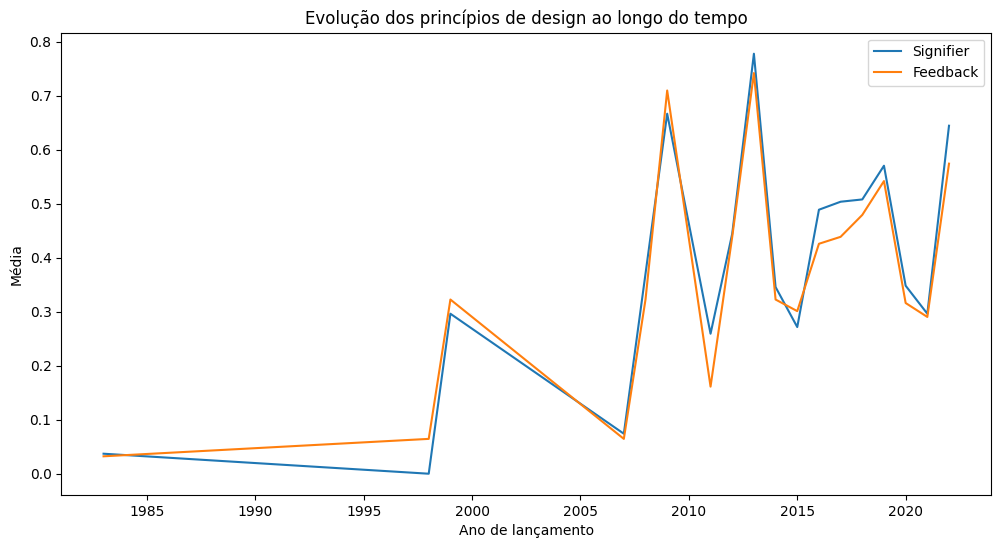

In [ ]:
# Visualização da evolução
plt.figure(figsize=(12,6))

for col in ["Signifier", "Feedback"]:
  plt.plot(year_stats.index, year_stats[col], label=col)

plt.xlabel("Ano de lançamento")
plt.ylabel("Média")
plt.title("Evolução dos princípios de design ao longo do tempo")
plt.legend()
plt.show()

# Correlação entre variáveis

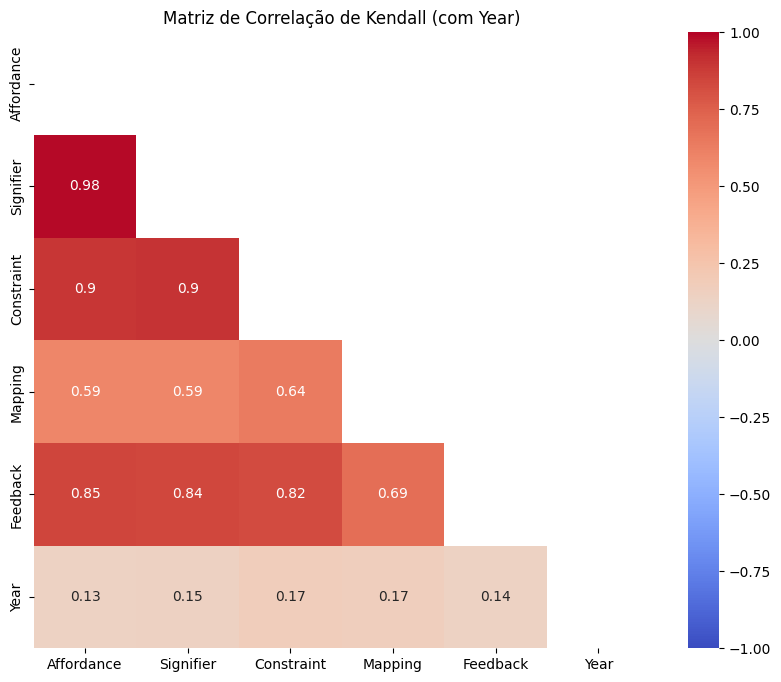

In [ ]:
cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback", "Year"]

# Matriz de correlação
corr = db_year[cols].corr(method="kendall")

# Máscara para esconder triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(
  corr,
  mask=mask,
  annot=True,
  cmap="coolwarm",
  vmin=-1, vmax=1,
  square=True
)
plt.title("Matriz de Correlação de Kendall (com Year)")
plt.show()

<Figure size 1000x800 with 0 Axes>

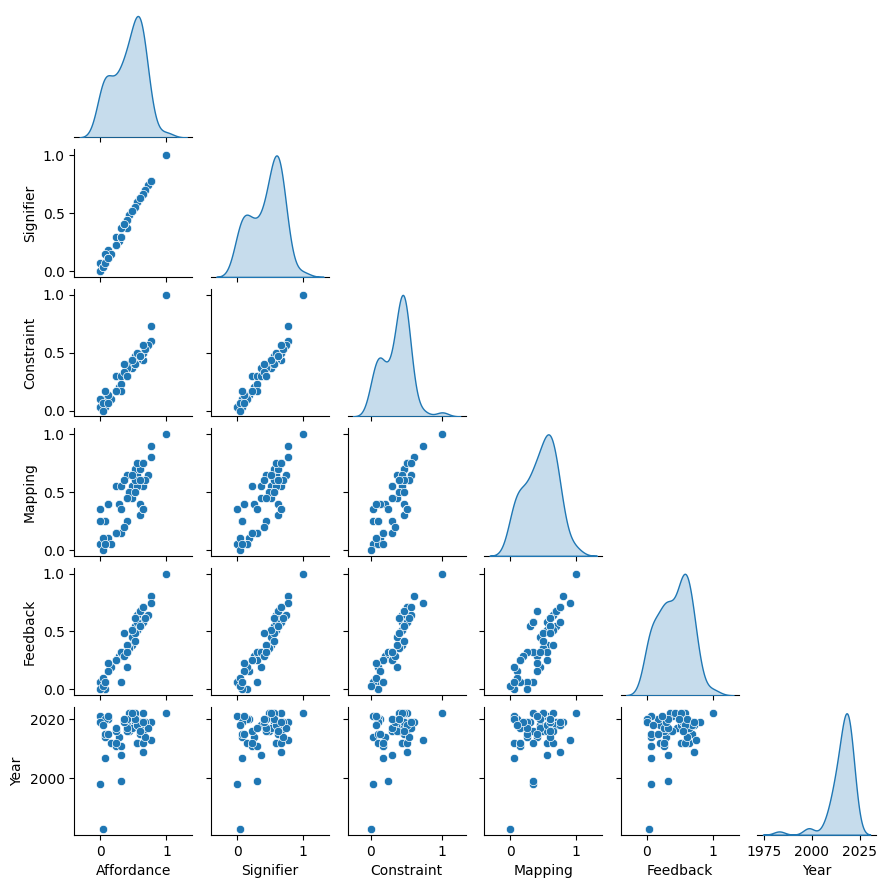

In [ ]:
cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback", "Year"]

# Matriz de correlação
corr = db_year[cols].corr(method="kendall")

# Máscara para esconder triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))
sns.pairplot(db_year[cols], corner=True, diag_kind="kde", height=1.5)
plt.show()

# Tendência de agrupamento

In [ ]:
# Estatística de Hopkins
# Adaptado de: https://www.youtube.com/watch?v=E2VAV9eUh1o
def hopkins(X, n_samples=100, seed=42):
  n, d = X.shape

  # número de amostras não pode ser maior que o dataset
  n_samples = min(n_samples, n)

  # Seleciona aleatoriamente pontos reais do dataset
  np.random.seed(seed)
  random_indices = np.random.choice(n, n_samples, replace=False)
  X_sample = X[random_indices]

  # Gera pontos artificiais no espaço de atributos
  X_min, X_max = np.min(X, axis=0), np.max(X, axis=0)
  U = np.random.uniform(X_min, X_max, (n_samples, d))

  # Vizinho mais próximo
  nbrs = NearestNeighbors(n_neighbors=2).fit(X)

  # xi = distâncias dos pontos reais (desconsidera distância 0 ao próprio ponto)
  distances_real, _ = nbrs.kneighbors(X_sample)
  xi = distances_real[:, 1]

  # yi = distâncias dos pontos artificiais
  distances_fake, _ = nbrs.kneighbors(U)
  yi = distances_fake[:, 0]

  H = yi.sum() / (xi.sum() + yi.sum())
  return H

features = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback"]
X = db[features].values

# Calcula H
H = hopkins(X, n_samples=100)
print(f"Estatística de Hopkins: {H:.4f}")

Estatística de Hopkins: 0.8621


# Agrupamento inicial

## Elbow Method

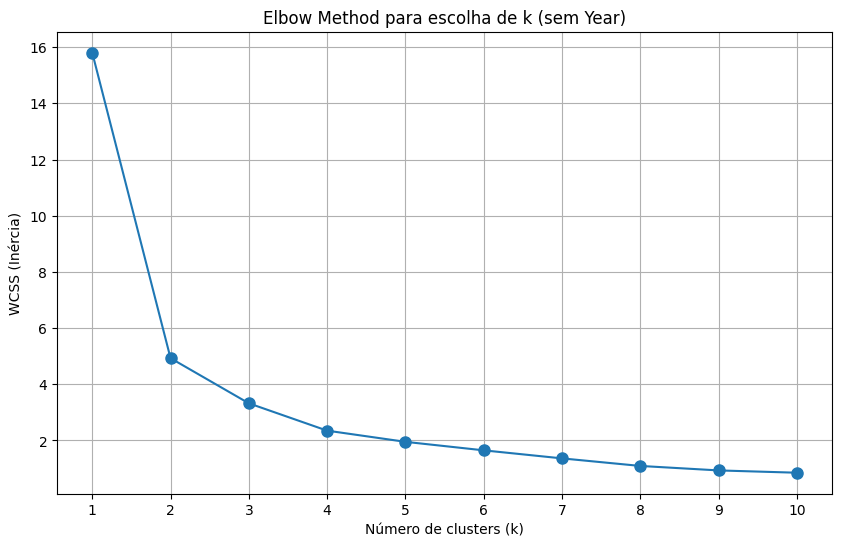

In [ ]:
wcss = []
K = range(1, 11)  # testar k de 1 até 10

design_cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback"]
X = db_year[design_cols].copy()

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Plot do Elbow
plt.figure(figsize=(10,6))
plt.plot(K, wcss, 'o-', markersize=8)
plt.xlabel("Número de clusters (k)")
plt.ylabel("WCSS (Inércia)")
plt.title("Elbow Method para escolha de k (sem Year)")
plt.xticks(K)
plt.grid(True)
plt.show()

k=2: Silhouette=0.575, WCSS=4.93
k=3: Silhouette=0.429, WCSS=3.32
k=4: Silhouette=0.440, WCSS=2.35
k=5: Silhouette=0.370, WCSS=1.95
k=6: Silhouette=0.322, WCSS=1.65
k=7: Silhouette=0.368, WCSS=1.36
k=8: Silhouette=0.364, WCSS=1.09
k=9: Silhouette=0.357, WCSS=0.93
k=10: Silhouette=0.355, WCSS=0.85


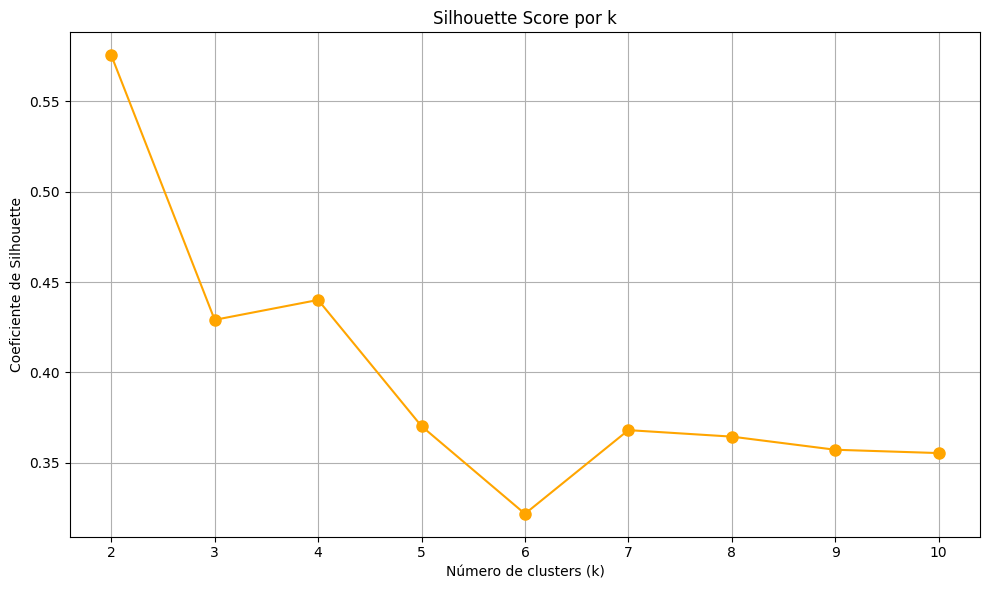

In [ ]:
silhouette_vals = []
K = range(2, 11)  # testar k de 1 até 10

design_cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback"]
X = db_year[design_cols].copy()

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X)

  # Silhouette
  score = silhouette_score(X, labels)
  silhouette_vals.append(score)
  print(f"k={k}: Silhouette={score:.3f}, WCSS={kmeans.inertia_:.2f}")

# Plot Silhouette
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_vals, 'o-', color="orange", markersize=8)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Coeficiente de Silhouette")
plt.title("Silhouette Score por k")
plt.grid(True)

plt.tight_layout()
plt.show()

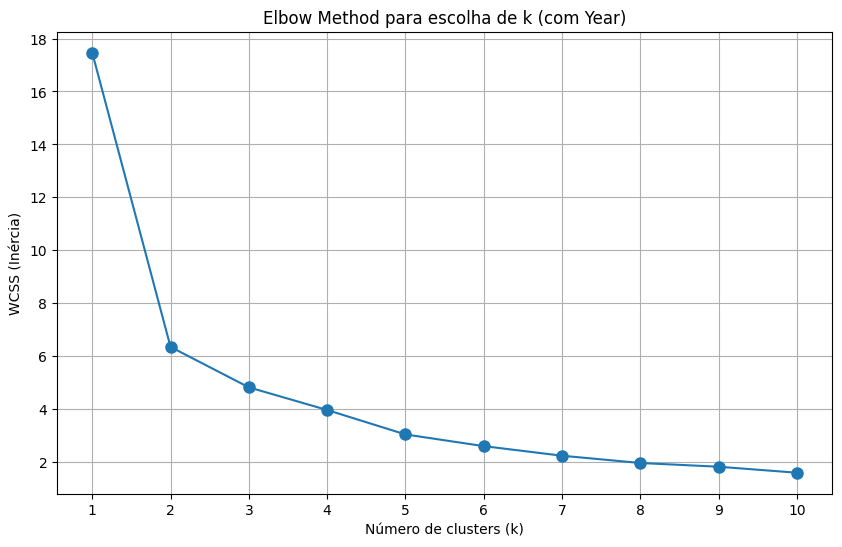

In [ ]:
wcss = []
K = range(1, 11)  # testar k de 1 até 10

design_cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback", "Year"]
X = db_year[design_cols].copy()

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  X_scaled = scaler.fit_transform(X)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

# Plot do Elbow
plt.figure(figsize=(10,6))
plt.plot(K, wcss, 'o-', markersize=8)
plt.xlabel("Número de clusters (k)")
plt.ylabel("WCSS (Inércia)")
plt.title("Elbow Method para escolha de k (com Year)")
plt.xticks(K)
plt.grid(True)
plt.show()

## KMeans sem Year

In [ ]:
# Agrupamento com KMeans utilizando todas as variáveis de design
design_cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback"]

X = db_year[design_cols].copy()

k = 2
kmeans_full = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_full = kmeans_full.fit_predict(X)

silhouette_full = silhouette_score(X, labels_full)
print(f"Silhouette Score (variáveis de design): {silhouette_full:.3f}")

Silhouette Score (variáveis de design): 0.575


Silhouette Score (PCA 2D): 0.592


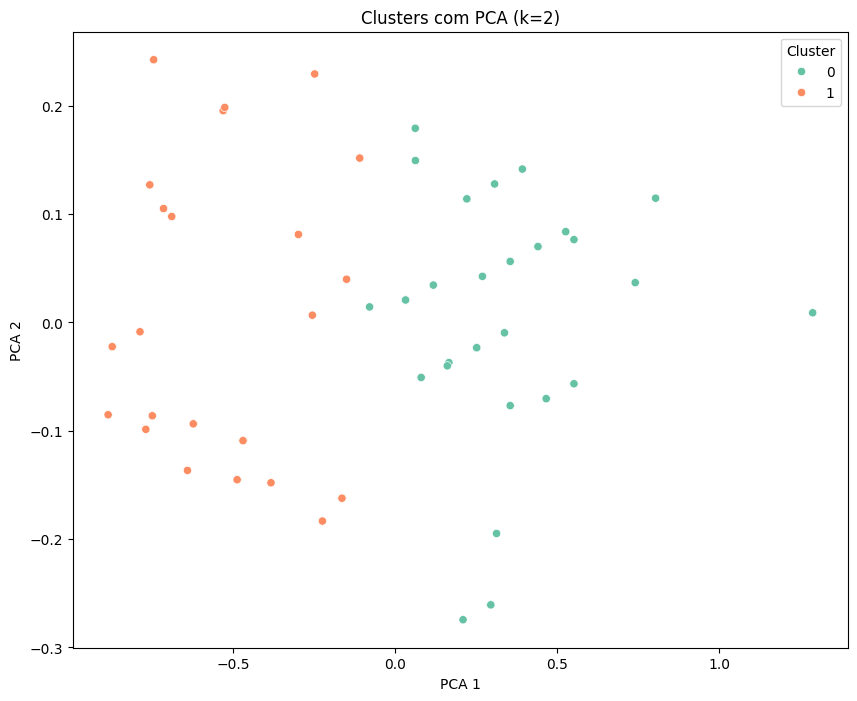

In [ ]:
# Agrupamento com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

silhouette_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score (PCA 2D): {silhouette_pca:.3f}")

# Plot PCA clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_pca, palette="Set2")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters com PCA (k=2)")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Média das variáveis originais em cada cluster
cluster_profiles = db_year.copy()
cluster_profiles["Cluster"] = labels_full
cluster_profiles.groupby("Cluster")[design_cols].mean()

,Affordance,Signifier,Constraint,Mapping,Feedback
Cluster,,,,,
0,0.582703,0.613614,0.481081,0.600000,0.576286
1,0.178333,0.186728,0.162500,0.235417,0.168011


In [ ]:
# Importância dos componentes (para PCA)
loadings = pd.DataFrame(pca.components_.T, columns=["PCA1", "PCA2"], index=design_cols)
print(loadings)

                PCA1      PCA2
Affordance  0.467731 -0.311326
Signifier   0.481726 -0.326743
Constraint  0.380741 -0.110182
Mapping     0.426623  0.882974
Feedback    0.471378 -0.067311


## KMeans com Year

In [ ]:
# Agrupamento com KMeans utilizando todas as variáveis
cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback", "Year"]

X = db_year[cols].copy()
X_scaled = scaler.fit_transform(X)

k = 2
kmeans_full = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_full = kmeans_full.fit_predict(X_scaled)

silhouette_full = silhouette_score(X_scaled, labels_full)
print(f"Silhouette Score (variáveis de design): {silhouette_full:.3f}")

Silhouette Score (variáveis de design): 0.540


Silhouette Score (PCA 2D): 0.603


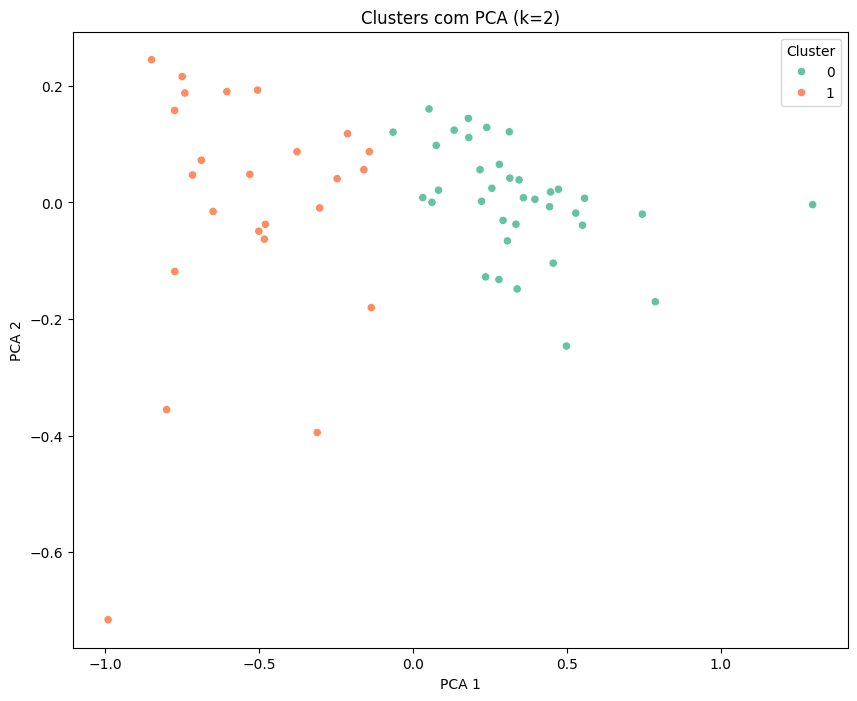

In [ ]:
# Agrupamento com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

silhouette_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score (PCA 2D): {silhouette_pca:.3f}")

# Plot PCA clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_pca, palette="Set2")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters com PCA (k=2)")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Média das variáveis originais em cada cluster
cluster_profiles = db_year.copy()
cluster_profiles["Cluster"] = labels_full
cluster_profiles.groupby("Cluster")[design_cols].mean()

,Affordance,Signifier,Constraint,Mapping,Feedback
Cluster,,,,,
0,0.582703,0.613614,0.481081,0.600000,0.576286
1,0.178333,0.186728,0.162500,0.235417,0.168011


## DBSCAN sem Year

In [ ]:
# Agrupamento com DBSCAN utilizando todas as variáveis de design
design_cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback"]

X = db_year[design_cols].copy()

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Verificar clusters encontrados
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"Número de clusters DBSCAN (excluindo outliers): {n_clusters_dbscan}")

# Silhouette
if n_clusters_dbscan > 1:
  sil_dbscan = silhouette_score(X, labels_dbscan)
  print(f"Silhouette Score (DBSCAN): {sil_dbscan:.3f}")
else:
  print("Não foi possível calcular Silhouette (apenas 1 cluster).")

Número de clusters DBSCAN (excluindo outliers): 2
Silhouette Score (DBSCAN): 0.443


Silhouette Score (PCA 2D): 0.502


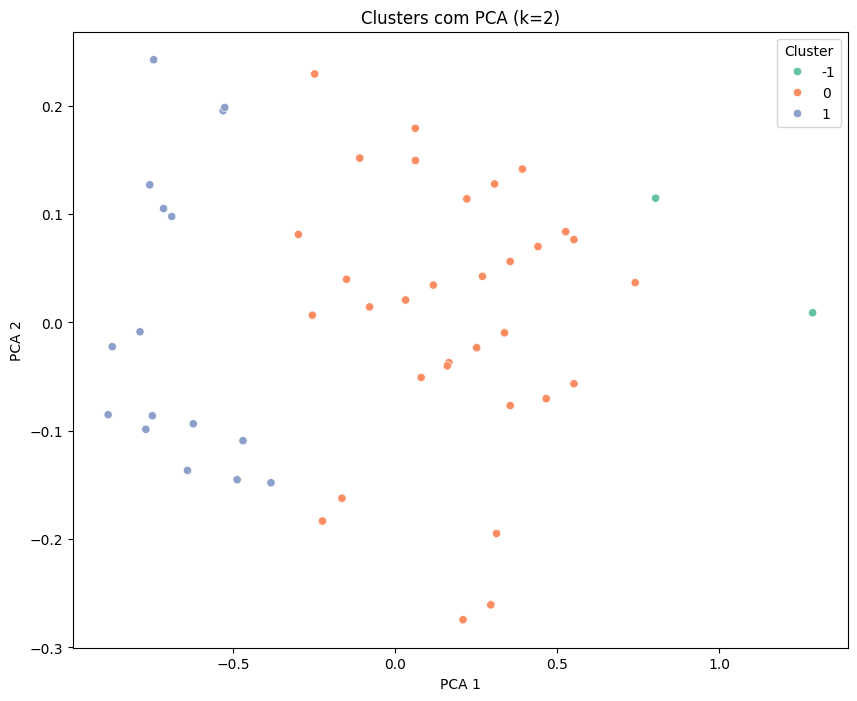

In [ ]:
# Agrupamento com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

dbscan_pca = DBSCAN(eps=0.2, min_samples=5)
labels_pca = dbscan_pca.fit_predict(X_pca)

silhouette_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score (PCA 2D): {silhouette_pca:.3f}")

# Plot PCA clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_pca, palette="Set2")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters com PCA (k=2)")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Média das variáveis originais em cada cluster
cluster_profiles = db_year.copy()
cluster_profiles["Cluster"] = labels_dbscan
cluster_profiles.groupby("Cluster")[design_cols].mean()

,Affordance,Signifier,Constraint,Mapping,Feedback
Cluster,,,,,
-1,0.404444,0.407407,0.370370,0.455556,0.383513
0,0.550526,0.581871,0.448246,0.567105,0.537351
1,0.091429,0.100529,0.095238,0.157143,0.105991


## DBSCAN com Year

In [ ]:
# Agrupamento com DBSCAN utilizando todas as variáveis
cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback", "Year"]

X = db_year[cols].copy()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Verificar clusters encontrados
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"Número de clusters DBSCAN (excluindo outliers): {n_clusters_dbscan}")

# Silhouette
if n_clusters_dbscan > 1:
  sil_dbscan = silhouette_score(X, labels_dbscan)
  print(f"Silhouette Score (DBSCAN): {sil_dbscan:.3f}")
else:
  print("Não foi possível calcular Silhouette (apenas 1 cluster).")

Número de clusters DBSCAN (excluindo outliers): 1
Não foi possível calcular Silhouette (apenas 1 cluster).


# Redução de dimensionalidade

In [ ]:
design_cols = ["Affordance", "Signifier", "Constraint", "Feedback"]

db_reduced = db['design_mean'] = db[design_cols].mean(axis=1)
db_reduced = db.drop(design_cols, axis=1)
db_reduced.head()

,Games,Mapping,design_mean
0,Guild of Dungeoneering,0.40,0.593429
1,Resident Evil 7: Biohazard,0.65,0.486995
2,Beat Saber,0.45,0.332646
3,Super Monkey Ball: Banana Blitz HD,0.80,0.736057
4,Smash Hit,0.25,0.062981


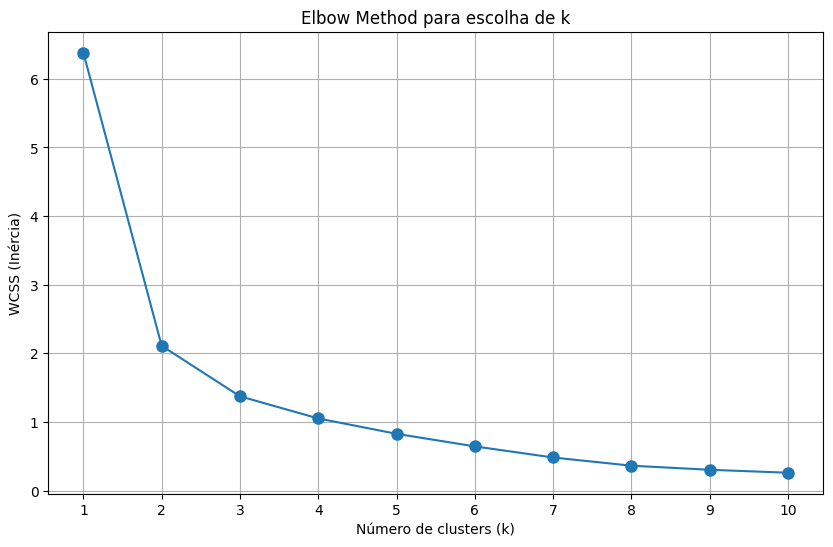

In [ ]:
# Elbow Method
wcss = []
K = range(1, 11)  # testar k de 1 até 10

cols = ["Mapping", "design_mean"]
X = db_reduced[cols].copy()

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Plot do Elbow
plt.figure(figsize=(10,6))
plt.plot(K, wcss, 'o-', markersize=8)
plt.xlabel("Número de clusters (k)")
plt.ylabel("WCSS (Inércia)")
plt.title("Elbow Method para escolha de k")
plt.xticks(K)
plt.grid(True)
plt.show()

k=2: Silhouette=0.579, WCSS=2.11
k=3: Silhouette=0.437, WCSS=1.37
k=4: Silhouette=0.430, WCSS=1.05
k=5: Silhouette=0.463, WCSS=0.83
k=6: Silhouette=0.411, WCSS=0.64
k=7: Silhouette=0.469, WCSS=0.48
k=8: Silhouette=0.454, WCSS=0.36
k=9: Silhouette=0.436, WCSS=0.30
k=10: Silhouette=0.449, WCSS=0.26


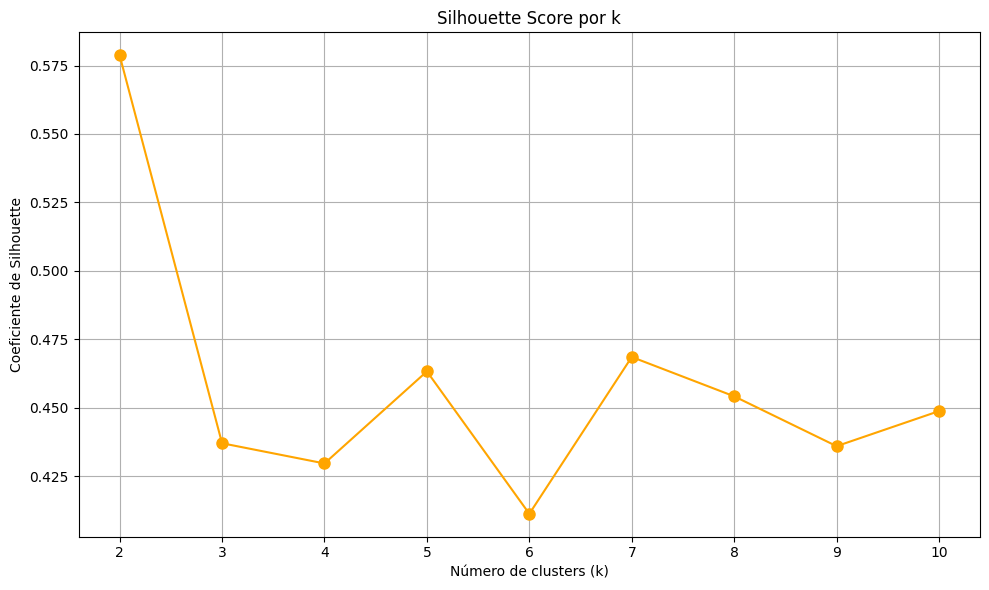

In [ ]:
silhouette_vals = []
K = range(2, 11)  # testar k de 1 até 10

X = db_reduced[cols].copy()

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X)

  # Silhouette
  score = silhouette_score(X, labels)
  silhouette_vals.append(score)
  print(f"k={k}: Silhouette={score:.3f}, WCSS={kmeans.inertia_:.2f}")

# Plot Silhouette
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_vals, 'o-', color="orange", markersize=8)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Coeficiente de Silhouette")
plt.title("Silhouette Score por k")
plt.grid(True)

plt.tight_layout()
plt.show()

Silhouette Score: 0.579


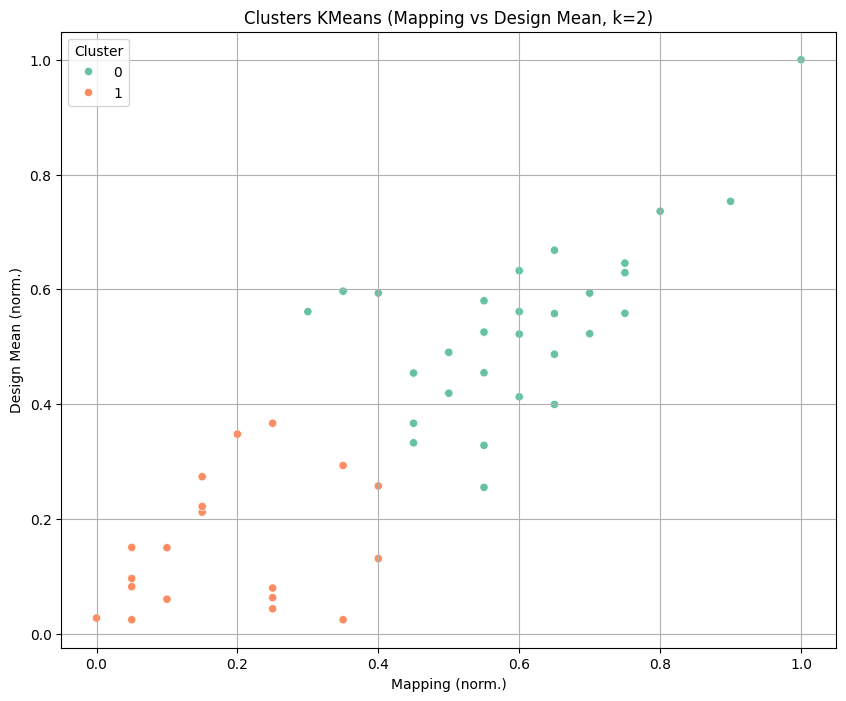

In [ ]:
# Agrupamento com KMeans
k = 2
kmeans_reduced = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_reduced = kmeans_reduced.fit_predict(X)

silhouette_reduced  = silhouette_score(X, labels_reduced)
print(f"Silhouette Score: {silhouette_reduced:.3f}")

# Visualização 2D dos clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X["Mapping"], y=X["design_mean"], hue=labels_reduced, palette="Set2")
plt.xlabel("Mapping (norm.)")
plt.ylabel("Design Mean (norm.)")
plt.title("Clusters KMeans (Mapping vs Design Mean, k=2)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
# Média das variáveis originais em cada cluster
cluster_profiles = db_reduced.copy()
cluster_profiles["Cluster"] = labels_reduced
cluster_profiles.groupby("Cluster")[cols].mean()

,Mapping,design_mean
Cluster,,
0,0.593750,0.544063
1,0.195238,0.155118


In [ ]:
# Média das variáveis originais em cada cluster
design_cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback"]
cluster_profiles = db.copy()
cluster_profiles["Cluster"] = labels_reduced
cluster_profiles.groupby("Cluster")[design_cols].mean()

,Affordance,Signifier,Constraint,Mapping,Feedback
Cluster,,,,,
0,0.563000,0.591667,0.469167,0.593750,0.552419
1,0.158095,0.167549,0.139683,0.195238,0.155146


Silhouette Score: 0.437


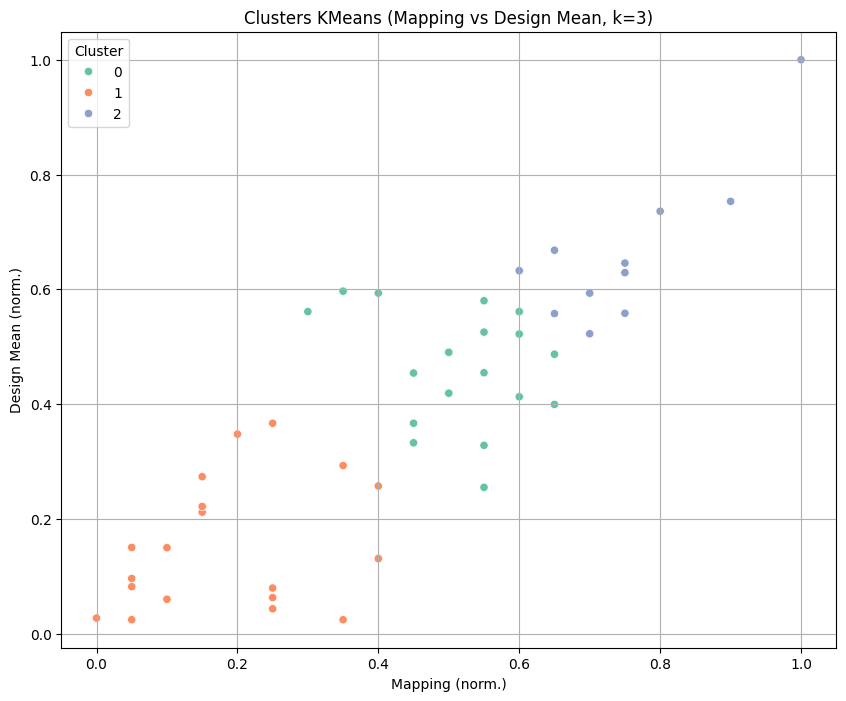

In [ ]:
# Agrupamento com 3 clusters
k = 3
kmeans_reduced = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_reduced = kmeans_reduced.fit_predict(X)

silhouette_reduced  = silhouette_score(X, labels_reduced)
print(f"Silhouette Score: {silhouette_reduced:.3f}")

# Visualização 2D dos clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X["Mapping"], y=X["design_mean"], hue=labels_reduced, palette="Set2")
plt.xlabel("Mapping (norm.)")
plt.ylabel("Design Mean (norm.)")
plt.title("Clusters KMeans (Mapping vs Design Mean, k=3)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
# Média das variáveis originais em cada cluster
cluster_profiles = db_reduced.copy()
cluster_profiles["Cluster"] = labels_reduced
cluster_profiles.groupby("Cluster")[cols].mean()

,Mapping,design_mean
Cluster,,
0,0.510000,0.480686
1,0.195238,0.155118
2,0.733333,0.649692


In [ ]:
# Média das variáveis originais em cada cluster
design_cols = ["Affordance", "Signifier", "Constraint", "Mapping", "Feedback"]
cluster_profiles = db.copy()
cluster_profiles["Cluster"] = labels_reduced
cluster_profiles.groupby("Cluster")[design_cols].mean()

,Affordance,Signifier,Constraint,Mapping,Feedback
Cluster,,,,,
0,0.502400,0.533333,0.417333,0.510000,0.469677
1,0.158095,0.167549,0.139683,0.195238,0.155146
2,0.664000,0.688889,0.555556,0.733333,0.690323
